                               SARIMAX Results                                
Dep. Variable:            독거노인_우울증환자수   No. Observations:                   25
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -191.689
Date:                Sun, 02 Feb 2025   AIC                            391.379
Time:                        18:09:16   BIC                            395.920
Sample:                             0   HQIC                           392.521
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8665      0.127      6.844      0.000       0.618       1.115
ma.L1         -1.6495      0.240     -6.867      0.000      -2.120      -1.179
ma.L2          0.9978      0.251      3.982      0.0

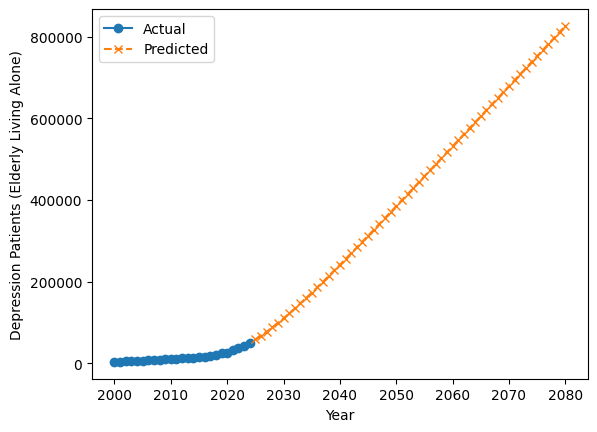

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.stattools import jarque_bera
from scipy import stats

file_path = r'C:\Users\BAE J.H\Desktop\우울증예측1.xlsx'
data = pd.read_excel(file_path)

data['독거노인_우울증환자수'] = data['독거노인인구'] * (data['우울증환자수비율'] / 100)

depression_series = data['독거노인_우울증환자수']

# ARIMA 모델 사용
model = ARIMA(depression_series, order=(1, 2, 2))
model_fit = model.fit()

print(model_fit.summary())

params = model_fit.params
bse = model_fit.bse  
t_values = params / bse 

p_values = 2 * (1 - stats.t.cdf(np.abs(t_values), df=len(depression_series) - len(params)))
print("\nP-values of the model parameters:")
print(p_values)

forecast_years = list(range(2025, 2081))
forecast_steps = len(forecast_years)

forecast = model_fit.forecast(steps=forecast_steps)

forecast_data = pd.DataFrame({
    '연도': forecast_years,
    '예측된_독거노인_우울증환자수': np.round(forecast)
})

print(forecast_data)

plt.plot(data['연도'], data['독거노인_우울증환자수'], label='Actual', marker='o')  # 실제 데이터
plt.plot(forecast_data['연도'], forecast_data['예측된_독거노인_우울증환자수'], label='Predicted', linestyle='--', marker='x')  # 예측된 데이터
plt.xlabel('Year')
plt.ylabel('Depression Patients (Elderly Living Alone)')
plt.legend()
plt.show()

output_file_path = r'C:\Users\BAE j.H\Desktop\독거노인_우울증예측.xlsx'
forecast_data.to_excel(output_file_path, index=False)